In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [4]:
df = pd.read_csv("Most-Recent-Cohorts-Field-of-Study.csv", low_memory=False)

In [5]:
df.shape

(229188, 174)

In [6]:
df.columns

Index(['UNITID', 'OPEID6', 'INSTNM', 'CONTROL', 'MAIN', 'CIPCODE', 'CIPDESC',
       'CREDLEV', 'CREDDESC', 'IPEDSCOUNT1',
       ...
       'EARN_COUNT_PELL_WNE_5YR', 'EARN_PELL_WNE_MDN_5YR',
       'EARN_COUNT_NOPELL_WNE_5YR', 'EARN_NOPELL_WNE_MDN_5YR',
       'EARN_COUNT_MALE_WNE_5YR', 'EARN_MALE_WNE_MDN_5YR',
       'EARN_COUNT_NOMALE_WNE_5YR', 'EARN_NOMALE_WNE_MDN_5YR',
       'EARN_COUNT_HIGH_CRED_5YR', 'EARN_IN_STATE_5YR'],
      dtype='object', length=174)

In [7]:
# Display column names
print(df.columns.tolist())

['UNITID', 'OPEID6', 'INSTNM', 'CONTROL', 'MAIN', 'CIPCODE', 'CIPDESC', 'CREDLEV', 'CREDDESC', 'IPEDSCOUNT1', 'IPEDSCOUNT2', 'DEBT_ALL_STGP_ANY_N', 'DEBT_ALL_STGP_ANY_MEAN', 'DEBT_ALL_STGP_ANY_MDN', 'DEBT_ALL_STGP_EVAL_N', 'DEBT_ALL_STGP_EVAL_MEAN', 'DEBT_ALL_STGP_EVAL_MDN', 'DEBT_ALL_PP_ANY_N', 'DEBT_ALL_PP_ANY_MEAN', 'DEBT_ALL_PP_ANY_MDN', 'DEBT_ALL_PP_EVAL_N', 'DEBT_ALL_PP_EVAL_MEAN', 'DEBT_ALL_PP_EVAL_MDN', 'DEBT_MALE_STGP_ANY_N', 'DEBT_MALE_STGP_ANY_MEAN', 'DEBT_MALE_STGP_ANY_MDN', 'DEBT_MALE_STGP_EVAL_N', 'DEBT_MALE_STGP_EVAL_MEAN', 'DEBT_MALE_STGP_EVAL_MDN', 'DEBT_MALE_PP_ANY_N', 'DEBT_MALE_PP_ANY_MEAN', 'DEBT_MALE_PP_ANY_MDN', 'DEBT_MALE_PP_EVAL_N', 'DEBT_MALE_PP_EVAL_MEAN', 'DEBT_MALE_PP_EVAL_MDN', 'DEBT_NOTMALE_STGP_ANY_N', 'DEBT_NOTMALE_STGP_ANY_MEAN', 'DEBT_NOTMALE_STGP_ANY_MDN', 'DEBT_NOTMALE_STGP_EVAL_N', 'DEBT_NOTMALE_STGP_EVAL_MEAN', 'DEBT_NOTMALE_STGP_EVAL_MDN', 'DEBT_NOTMALE_PP_ANY_N', 'DEBT_NOTMALE_PP_ANY_MEAN', 'DEBT_NOTMALE_PP_ANY_MDN', 'DEBT_NOTMALE_PP_EVAL_N', 'D

In [8]:
df.head()

,UNITID,OPEID6,INSTNM,CONTROL,MAIN,CIPCODE,CIPDESC,CREDLEV,CREDDESC,IPEDSCOUNT1,...,EARN_COUNT_PELL_WNE_5YR,EARN_PELL_WNE_MDN_5YR,EARN_COUNT_NOPELL_WNE_5YR,EARN_NOPELL_WNE_MDN_5YR,EARN_COUNT_MALE_WNE_5YR,EARN_MALE_WNE_MDN_5YR,EARN_COUNT_NOMALE_WNE_5YR,EARN_NOMALE_WNE_MDN_5YR,EARN_COUNT_HIGH_CRED_5YR,EARN_IN_STATE_5YR
0,100654.0,1002,Alabama A & M University,Public,1,100,"Agriculture, General.",3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
1,100654.0,1002,Alabama A & M University,Public,1,101,Agricultural Business and Management.,3,Bachelor's Degree,NaN,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
2,100654.0,1002,Alabama A & M University,Public,1,109,Animal Sciences.,3,Bachelor's Degree,3.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
3,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,3,Bachelor's Degree,7.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS
4,100654.0,1002,Alabama A & M University,Public,1,110,Food Science and Technology.,5,Master's Degree,4.0,...,PS,PS,PS,PS,PS,PS,PS,PS,PS,PS


In [15]:
bachelors_df = df[df['CREDDESC'].str.contains("Bachelor's Degree", na=False)]

In [16]:
bachelors_df.shape

(72204, 174)

In [19]:
selected_cols = [
    'INSTNM', 'CIPDESC', 'CREDLEV', 'CREDDESC',
    'DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR',
    'EARN_MDN_5YR']
data = bachelors_df[selected_cols].copy()

In [21]:
data.shape

(72204, 8)

In [23]:
print(data.columns)

Index(['INSTNM', 'CIPDESC', 'CREDLEV', 'CREDDESC', 'DEBT_ALL_PP_ANY_MDN',
       'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR'],
      dtype='object')


In [25]:
# Convert strings to numeric, force errors to NaN
for col in ['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with missing values
df_clean = data.dropna(subset=['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR'])

In [26]:
# Display summary statistics
df_clean.describe()

,CREDLEV,DEBT_ALL_PP_ANY_MDN,EARN_MDN_1YR,EARN_MDN_4YR,EARN_MDN_5YR
count,7694.0,7694.000000,7694.000000,7694.000000,7694.000000
mean,3.0,30742.874838,45585.734468,56622.991942,65685.205355
std,0.0,17944.027403,17956.323371,17837.468906,20484.698856
min,3.0,4200.000000,6394.000000,17575.000000,15396.000000
25%,3.0,17986.750000,32563.250000,43703.750000,50651.250000
50%,3.0,26306.500000,39945.500000,52007.500000,60992.000000
75%,3.0,39289.750000,55279.000000,66644.750000,77530.750000
max,3.0,138024.000000,154492.000000,206646.000000,242357.000000


C:\Users\layan\AppData\Local\Temp\ipykernel_14276\660348885.py:14: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


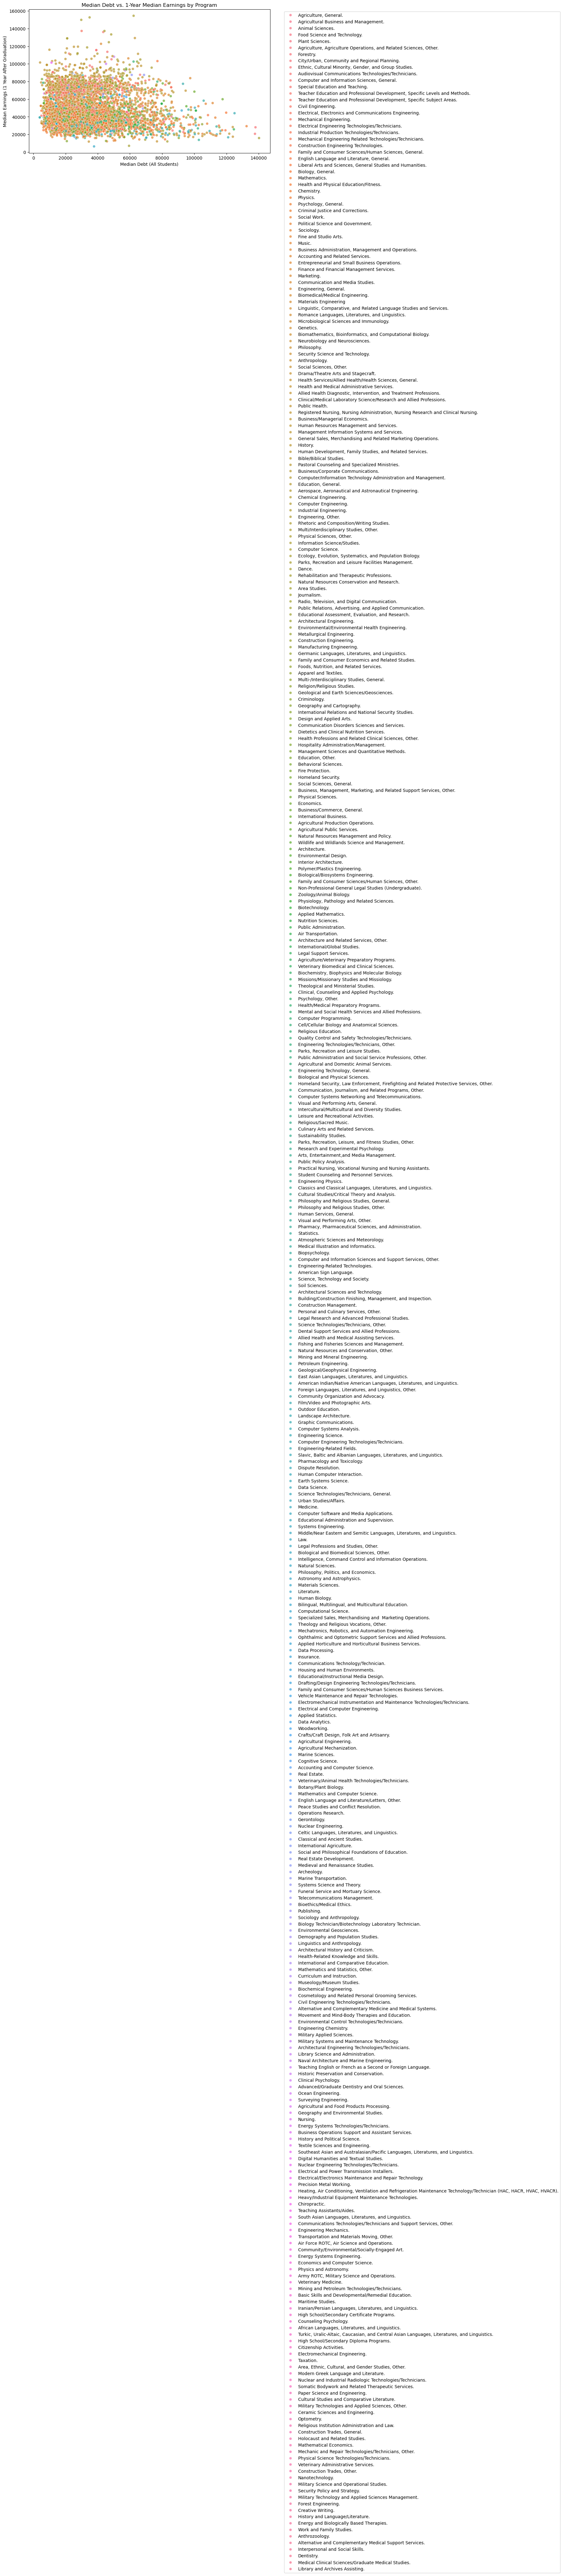

In [29]:
# Visualize average debt vs. earnings 1 year out
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=data,
    x='DEBT_ALL_PP_ANY_MDN',
    y='EARN_MDN_1YR',
    hue='CIPDESC',
    alpha=0.7
)
plt.title("Median Debt vs. 1-Year Median Earnings by Program")
plt.xlabel("Median Debt (All Students)")
plt.ylabel("Median Earnings (1 Year After Graduation)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

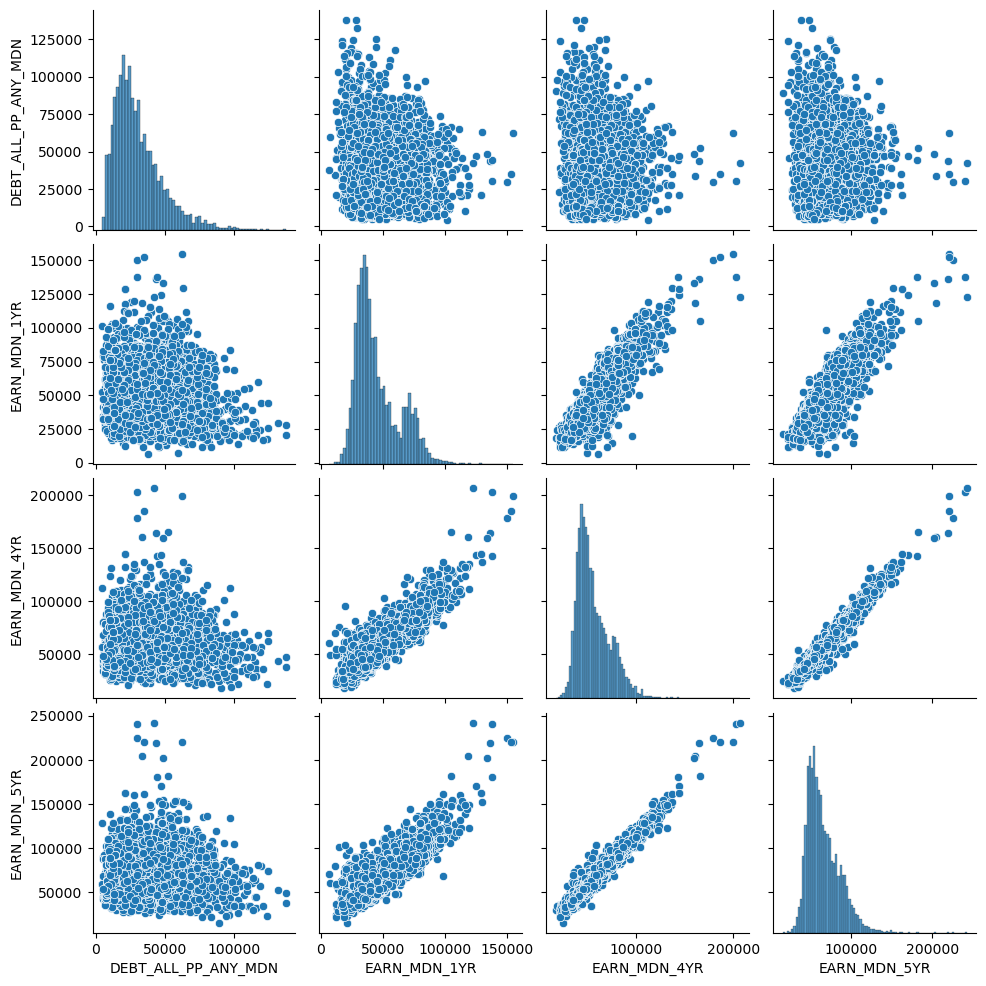

In [30]:
sns.pairplot(df_clean[['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']])
plt.show()

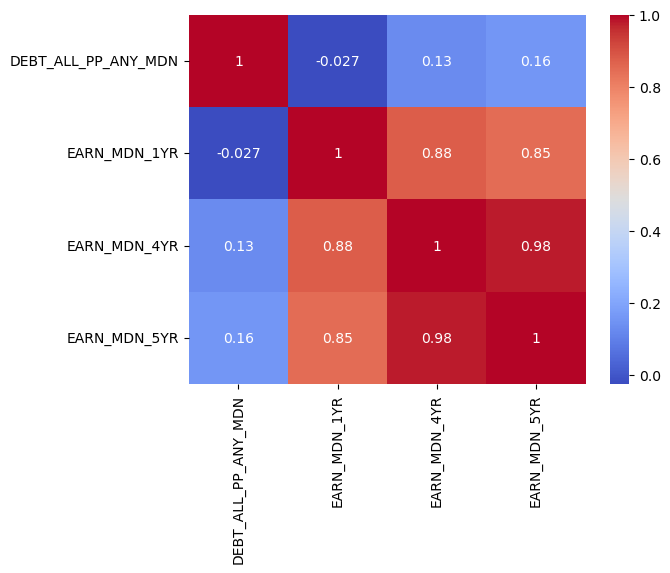

In [31]:
sns.heatmap(df_clean[['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']].corr(), annot=True, cmap="coolwarm")
plt.show()

In [32]:
# Features for clustering
features = ['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']
X = df_clean[features]

In [33]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
# Elbow method to find optimal k
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

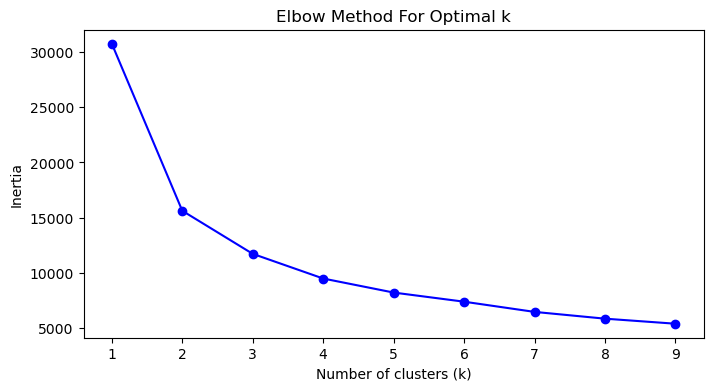

In [35]:
# Plot the elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [36]:
# Based on the elbow plot, choose k=3
kmeans = KMeans(n_clusters=3, random_state=42)
df_clean['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\layan\AppData\Local\Temp\ipykernel_14276\424157178.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster'] = kmeans.fit_predict(X_scaled)


In [72]:
cluster_labels = {
    0: 'Moderate-debt high-outcome',
    1: 'Low-cost high-value',
    2: 'High-debt low-outcome'}

df_clean['Cluster_Label'] = df_clean['Cluster'].map(cluster_labels)

C:\Users\layan\AppData\Local\Temp\ipykernel_14276\3765543397.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Cluster_Label'] = df_clean['Cluster'].map(cluster_labels)


In [60]:
# Display cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df = pd.DataFrame(cluster_centers, columns=features)
cluster_df['Cluster_Label'] = cluster_labels.values()
print(cluster_df)

   DEBT_ALL_PP_ANY_MDN  EARN_MDN_1YR  EARN_MDN_4YR  EARN_MDN_5YR  \
0         30661.757836  71020.843782  80716.773509  92637.398888   
1         22531.440678  36649.238204  46678.449153  54168.039853   
2         57418.112593  37219.880000  53482.528148  63442.617037   

            Cluster_Label  
0  high-debt high-outcome  
1     Low-cost high-value  
2   High-debt low-outcome  


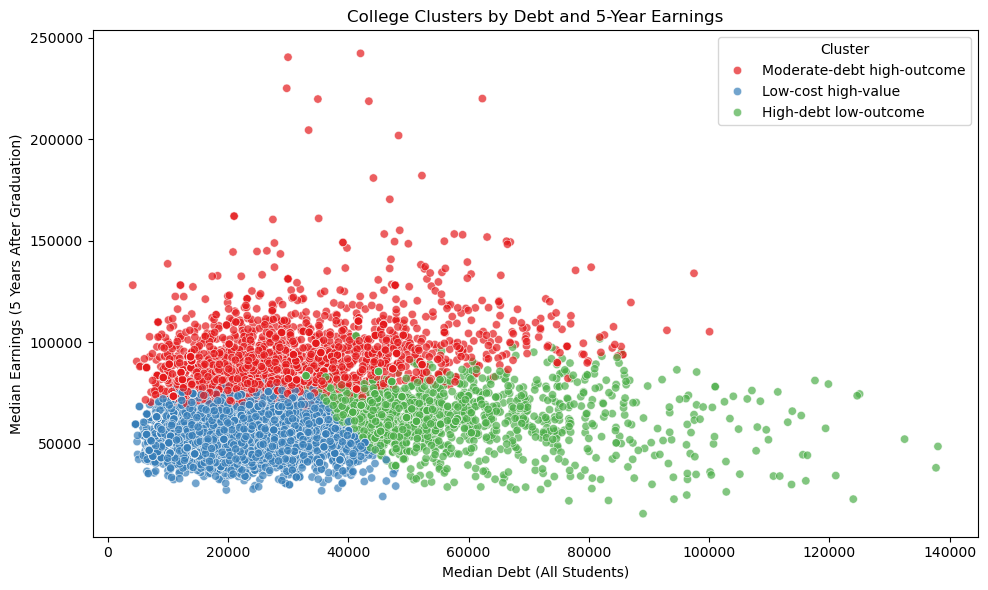

In [76]:
# Scatter plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x='DEBT_ALL_PP_ANY_MDN',
    y='EARN_MDN_5YR',
    hue='Cluster_Label',
    palette='Set1',
    alpha=0.7
)
plt.title("College Clusters by Debt and 5-Year Earnings")
plt.xlabel("Median Debt (All Students)")
plt.ylabel("Median Earnings (5 Years After Graduation)")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()

In [64]:
cluster_summary = df_clean.groupby('Cluster')[['DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_1YR', 'EARN_MDN_4YR', 'EARN_MDN_5YR']].mean().round(2)
cluster_summary['Count'] = df_clean['Cluster'].value_counts().sort_index()
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          DEBT_ALL_PP_ANY_MDN  EARN_MDN_1YR  EARN_MDN_4YR  EARN_MDN_5YR  Count
Cluster                                                                      
0                   30667.30      71010.50      80709.59      92631.68   1979
1                   22543.80      36658.11      46688.91      54182.07   4370
2                   57493.46      37182.83      53459.09      63411.31   1345


In [66]:
df_clean['Earnings_to_Debt'] = df_clean['EARN_MDN_5YR'] / df_clean['DEBT_ALL_PP_ANY_MDN']
df_clean['Earnings_to_Debt'] = df_clean['Earnings_to_Debt'].replace([float('inf'), -float('inf')], None)

C:\Users\layan\AppData\Local\Temp\ipykernel_14276\200568636.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Earnings_to_Debt'] = df_clean['EARN_MDN_5YR'] / df_clean['DEBT_ALL_PP_ANY_MDN']
C:\Users\layan\AppData\Local\Temp\ipykernel_14276\200568636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Earnings_to_Debt'] = df_clean['Earnings_to_Debt'].replace([float('inf'), -float('inf')], None)


In [56]:
top_programs = df_clean.sort_values(by='Earnings_to_Debt', ascending=False).groupby('Cluster').head(3)
print("Top 3 programs by ROI in each cluster:\n", top_programs[['INSTNM', 'CIPDESC', 'DEBT_ALL_PP_ANY_MDN', 'EARN_MDN_5YR', 'Earnings_to_Debt']])

Top 3 programs by ROI in each cluster:
                                                    INSTNM  \
114371                                CUNY Lehman College   
6594                University of Arkansas at Little Rock   
210006                       Columbia Southern University   
212911                            Independence University   
177426                            Stevens-Henager College   
207830                       Strayer University-Tennessee   
18074                              University of La Verne   
10477   California Polytechnic State University-San Lu...   
205934                 University of Connecticut-Stamford   

                                                  CIPDESC  \
114371  Registered Nursing, Nursing Administration, Nu...   
6594    Registered Nursing, Nursing Administration, Nu...   
210006                                   Fire Protection.   
212911                                     Public Health.   
177426                                     P